path length:  37
sign of path:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
path type: ((1, 6.073745796940265), (3, -6.073745796940267), (1, 6.073745796940267)) $
path length:  16
sign of path:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0]
path type: ((1, 1.7062278549566148), (3, 4.678366277331246), (1, -1.583170925330568)) $
path length:  13
sign of path:
 [1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
path type: ((3, 1.2404711946833764), (1, -4.23196182260567), (3, -0.9171236695838463)) $
path length:  37
sign of path:
 [1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
path type: ((1, 2.11635513031722), (3, -5.354352666425

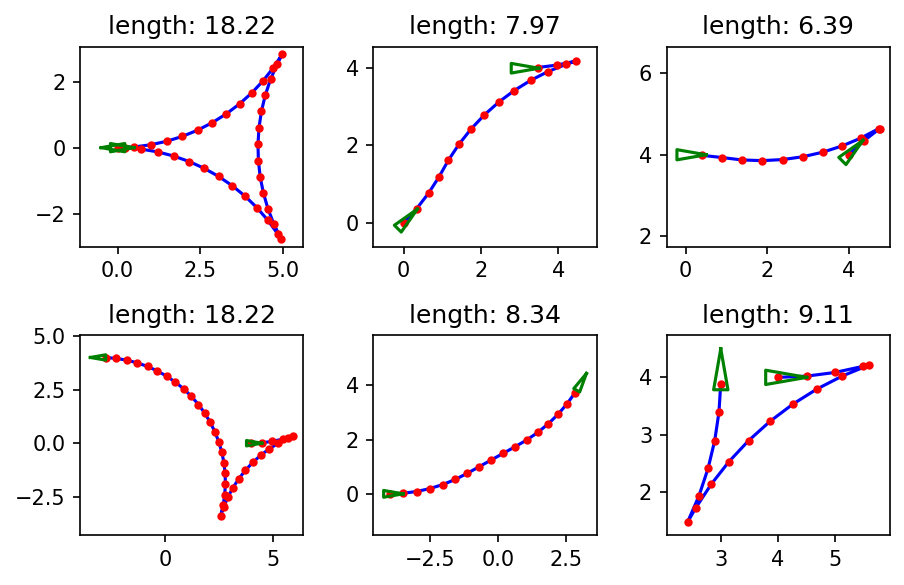

In [16]:
""" Study RS Curves: 
web: https://github.com/liespace/pyReedsShepp/blob/master/demos/demo.py
"""

import reeds_shepp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


step_size = 0.5
rho = 5.8 # turning radius，半径

# 定义六个 起点（x, y, th），终点（x, y, th）组
qs = [
    [( 0.0, 0.0,     0.0), ( 0.0, 0.0,   np.pi)],
    [( 0.0, 0.0, np.pi/4), ( 3.0, 4.0,     0.0)],
    [( 4.0, 4.0, np.pi/4), ( 0.0, 4.0,     0.0)],
    [( 4.0, 0.0,     0.0), (-3.0, 4.0,   np.pi)],
    [(-4.0, 0.0,     0.0), ( 3.0, 4.0, np.pi/3)],
    [( 4.0, 4.0,     0.0), ( 3.0, 4.0, np.pi/2)]
]

def get_point(center, radius, orin):
	x = center[0] + radius * np.cos(orin)
	y = center[1] + radius * np.sin(orin)
	return (x,y)

def plot_car(q):
    a = get_point(q[:-1], step_size, q[2])
    b = get_point(q[:-1], step_size/2, q[2]+150./180.*np.pi)
    c = get_point(q[:-1], step_size/2, q[2]-150./180.*np.pi)
    tri = np.array([a,b,c,a])
    plt.plot(tri[:,0], tri[:,1], 'g-')

def plot_path(q0, q1):
    qs = reeds_shepp.path_sample(q0, q1, rho, step_size)  # 起始点，结束点，转弯半径，步长
    print("path length: ", len(qs))
    print("sign of path:\n", [np.sign(q[4]) for q in qs])
    xs = [q[0] for q in qs]
    ys = [q[1] for q in qs]
    plt.plot(xs, ys, 'b-')
    plt.plot(xs, ys, 'r.')
    plot_car(q0)
    plot_car(q1)
    plt.axis('equal')


def plot_table(cols):
    rows = ((len(qs)) / cols)
    plt.figure(dpi=150)
    # plt.tight_layout(5)
    # plt.Figure(constrained_layout=True)
    for i,(q0, q1) in enumerate(qs):
        plt.subplot(int(rows), int(cols), int(i+1))
        # plt.figure(dpi=100)
        plot_path(q0, q1)
        dist = reeds_shepp.path_length(q0, q1, rho)
        print("path type: {} $".format(reeds_shepp.path_type(q0, q1, rho)))
        plt.title('length: {:.2f}'.format(dist))
    plt.savefig('demo.png')
    plt.tight_layout()  # 防止 title 重叠
    plt.show()


if __name__ == "__main__":
    plot_table(3)

In [ ]:
"""drawArc

void drawArc(const double turn_radius, int forward, int left, 
             double &x, double &y, double &angle, double incr_dist)
{
    x = x + forward*turn_radius*(-std::sin(angle) + std::sin(angle+incr_dist/turn_radius));
    y = y + left*turn_radius*(std::cos(angle) - std::cos(angle+forward*left*incr_dist/turn_radius));
    angle = angle + forward*left*incr_dist/turn_radius;
    angle = std::atan2(std::sin(angle), std::cos(angle));
}

"""

import math

def drawArc(turn_radius, forward, left, x, y, angle, incr_dist):
    """
    绘制圆形曲线，使用右手坐标系。
    @ turn_radius: float: 转弯半径
    @ forward: bool: 是否前行（1） 
    @ left: bool: 是否左传（1）
    @ x: float: 输入点 x 坐标值
    @ y: float: 输入点 y 坐标值
    @ angle: float: 输入点 角度 值
    @ incr_dist: 当前点到下一个点的增加距离（m）
    """
    x = x + forward * turn_radius * (math.sin(angle) + math.sin(angle + incr_dist / turn_radius))
    y = y + left * turn_radius * (math.cos(angle) - math.cos(angle + forward * left * incr_dist / turn_radius))
    angle = angle + forward * left * incr_dist / turn_radius
    angle = math.atan2(math.sin(angle), math.cos(angle))



""" 1. 如何使用 drawArc 函数

知道 start_pose: (x, y, theta)

// 使用角度作跳出判断是否跳出循环
// p 表示当前点 p(x, y, theta)
// path 用来保存所有的曲线点 p(x, y, theta)
// 使用 drawArc 更新 p 坐标
// 如果车体在曲线路径之后相对于起始位置旋转90度，退出循环 
while (dth_temp < 1.571) {
    p.set(x, y, angle, m_exit_direction*m_steering);
    path.push_back(p);

    drawArc(m_turn_radius, 1, m_exit_direction, x, y, angle, incr_dist);
    
    // （循环中角度的增量（angle）+ 当前车的角度（theta_c））- 车起始角度（theta_s） = 在圆弧路径之后，当前车的位置相对于起始位置旋转的角度
    // 使用这个角度来判断车是否旋转了 90 度
    dth_temp = angle + m_car_pose.theta() - m_start_pose.theta();  
    dth_temp = std::abs(std::atan2(sin(dth_temp), cos(dth_temp)));
}

"""

""" 2. 转弯半径 turn_radius 的计算方式
// 转弯半径 = 轴距 / tan（转向角度），见 7204-20，对 比 底
m_turn_radius = m_wheel_base / std::tan(m_steering);
"""

path = []
p = [0, 0, 0]  # x, y, theta

